<a href="https://colab.research.google.com/github/dspohnholtz/cs4410/blob/main/spohnholtz_homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Troy University, CS4410

Created By: Dan Spohnholtz

Homework 4

# **Loading the Dataset**

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import pandas as pd
import seaborn as sns

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# **Checking the Sample and Target Sizes**

In [72]:
print(cancer.data.shape)

(569, 30)


In [73]:
print(cancer.target.shape)

(569,)


# **Splitting the Data for Training and Testing**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=16)
print(X_train.shape) 

(426, 30)


In [75]:
print(X_test.shape)

(143, 30)


# **Creating the Model**

In [76]:
GausNB = GaussianNB()

# **Training the Model**

In [77]:
GausNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# **Predictors**

In [78]:
y_pred = GausNB.predict(X=X_test)


# **Estimator Method Score**

In [79]:
print(f'{GausNB.score(X_test, y_test):2%}')

96.503497%


# **Confusion Matrix**

In [80]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[48  4]
 [ 1 90]]


# **Classification Report**

In [81]:
names = [str(cancer) for cancer in cancer.target_names]
print(classification_report(y_test, y_pred, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.92      0.95        52
      benign       0.96      0.99      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



# **Visualizing the Confusion Matrix**

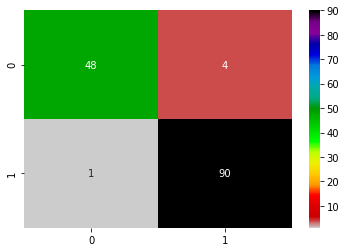

In [82]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

# **K-Fold Cross Validation**

In [83]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=GausNB, X=cancer.data, y=cancer.target, cv=kfold)
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 93.85%
Accuracy standard deviation: 2.75%


# **Running Multiple Models to Find the Best One**

In [86]:
estimators = {
    'GaussianNB': GausNB,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='ibfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

for estimator_name, estimator_object, in estimators.items():
  print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')


          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=93.85%; standard deviation=2.75%
  LogisticRegression: mean accuracy=93.85%; standard deviation=2.75%
                 SVC: mean accuracy=93.85%; standard deviation=2.75%
